In [5]:
import pandas as pd
df = pd.read_csv('/content/sample_data/Crop Production data-Final-csv.csv')


In [7]:
print(df.head())

                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production   Region  
0             Arecanut  1254.0      2000.0  Islands  
1  Other Kharif pulses     2.0         1.0  Islands  
2                 Rice   102.0       321.0  Islands  
3               Banana   176.0       641.0  Islands  
4            Cashewnut   720.0       165.0  Islands  


In [9]:
print(df.info)

<bound method DataFrame.info of                          State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Prod

In [11]:
print(df.isnull().sum())


State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
Region           0
dtype: int64


In [12]:
df = df.dropna(subset=['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area', 'Production', 'Region'])


In [13]:
# Fill missing production values with 0 if it's plausible that no production occurred
df['Production'] = df['Production'].fillna(0)

In [15]:
# Convert 'Crop_Year' to integer if it's not already
df['Crop_Year'] = df['Crop_Year'].astype(int)


In [16]:
# Convert 'Area' and 'Production' to numeric values
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df['Production'] = pd.to_numeric(df['Production'], errors='coerce')



In [17]:
# Drop any remaining rows with NaN values in 'Area' or 'Production' after type conversion
df.dropna(subset=['Area', 'Production'], inplace=True)

In [18]:
# Check for duplicates and remove them
df = df.drop_duplicates()


In [21]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 246087 entries, 0 to 246090
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246087 non-null  object 
 1   District_Name  246087 non-null  object 
 2   Crop_Year      246087 non-null  int64  
 3   Season         246087 non-null  object 
 4   Crop           246087 non-null  object 
 5   Area           246087 non-null  float64
 6   Production     246087 non-null  float64
 7   Region         246087 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 16.9+ MB
None


In [22]:
df['Crop_Year'] = df['Crop_Year'].astype(int)


In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 246087 entries, 0 to 246090
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246087 non-null  object 
 1   District_Name  246087 non-null  object 
 2   Crop_Year      246087 non-null  int64  
 3   Season         246087 non-null  object 
 4   Crop           246087 non-null  object 
 5   Area           246087 non-null  float64
 6   Production     246087 non-null  float64
 7   Region         246087 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 16.9+ MB
None


In [25]:
# Step 4: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt


In [26]:
production_by_year = df.groupby('Crop_Year')['Production'].sum()


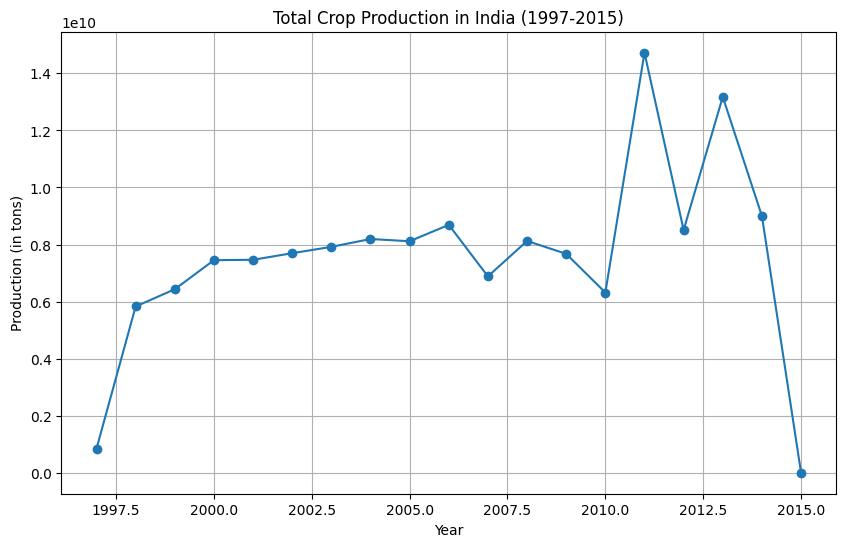

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(production_by_year.index, production_by_year.values, marker='o')
plt.title('Total Crop Production in India (1997-2015)')
plt.xlabel('Year')
plt.ylabel('Production (in tons)')
plt.grid(True)
plt.show()

In [28]:
# Calculate and visualize the yield (production per unit area) for different crops.



In [29]:
df['Yield'] = df['Production'] / df['Area']


In [30]:
avg_yield_per_crop = df.groupby('Crop')['Yield'].mean().sort_values(ascending=False)


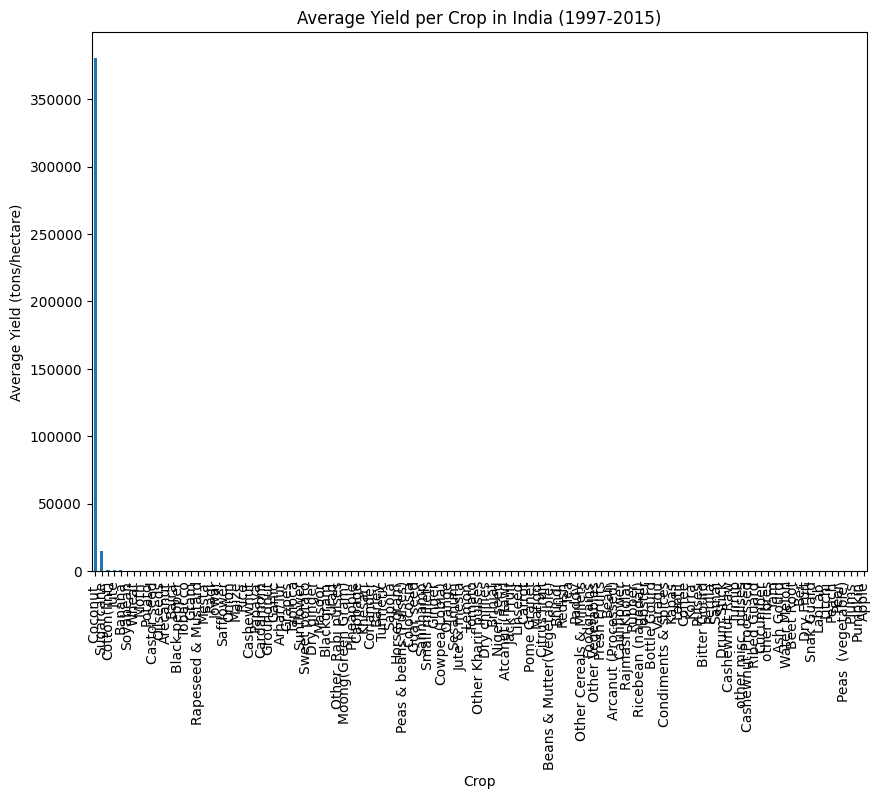

In [37]:
# Plot average yield per crop
plt.figure(figsize=(10, 7))
avg_yield_per_crop.plot(kind='bar')
plt.title('Average Yield per Crop in India (1997-2015)')
plt.xlabel('Crop')
plt.ylabel('Average Yield (tons/hectare)')
plt.show()

In [38]:
# Top rops by Region and State
production_by_state_crop = df.groupby(['State_Name', 'Crop'])['Production'].sum().reset_index()


In [39]:
top_crop_by_state = production_by_state_crop.sort_values('Production', ascending=False).drop_duplicates('State_Name')


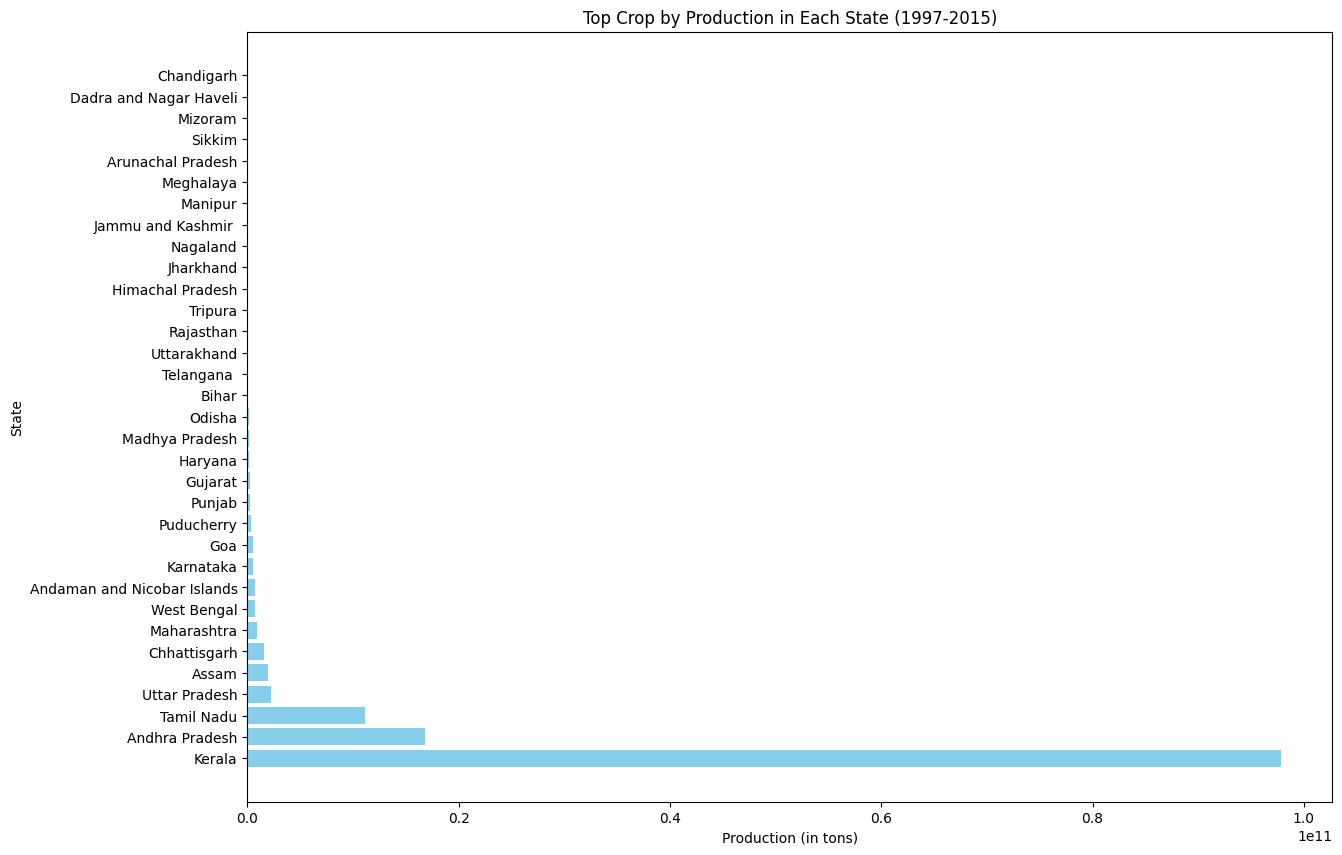

In [40]:
plt.figure(figsize=(14, 10))
plt.barh(top_crop_by_state['State_Name'], top_crop_by_state['Production'], color='skyblue')
plt.xlabel('Production (in tons)')
plt.ylabel('State')
plt.title('Top Crop by Production in Each State (1997-2015)')
plt.show()

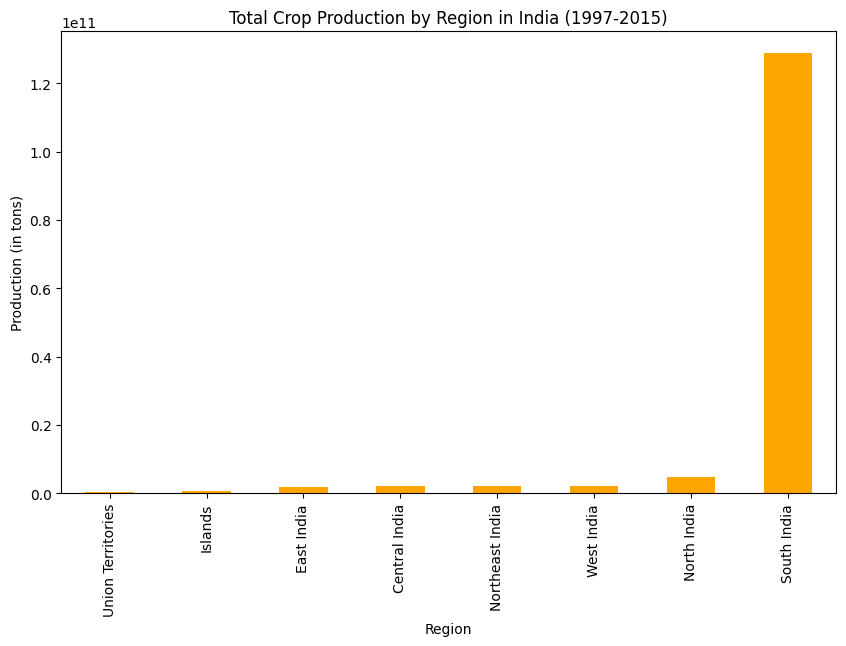

In [42]:
# Regional Comparisons
# Group by region and calculate total production and average yield
regional_production = df.groupby('Region')['Production'].sum().sort_values()
regional_yield = df.groupby('Region')['Yield'].mean().sort_values()

# Plot total production by region
plt.figure(figsize=(10, 6))
regional_production.plot(kind='bar', color='orange')
plt.title('Total Crop Production by Region in India (1997-2015)')
plt.xlabel('Region')
plt.ylabel('Production (in tons)')
plt.show()



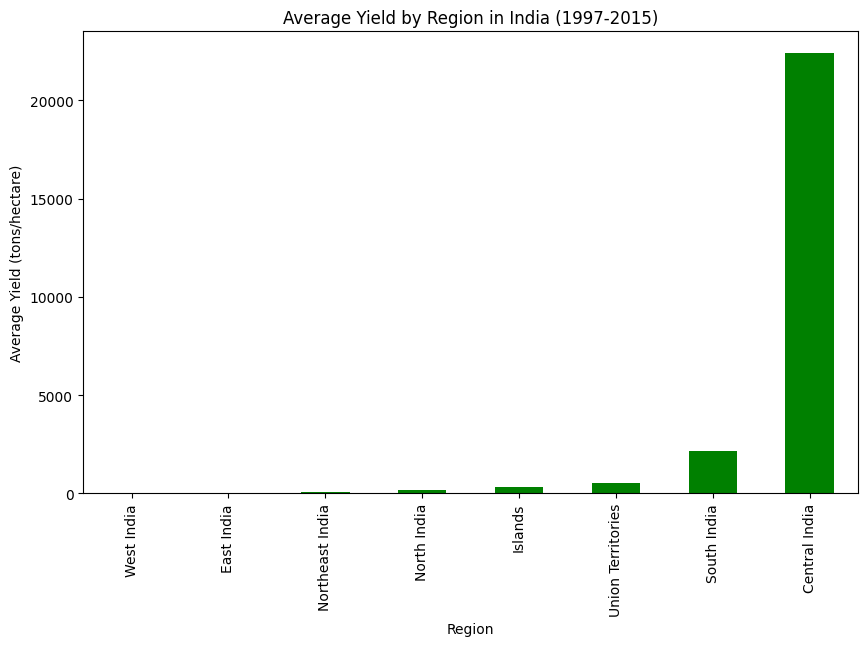

In [43]:
# Plot average yield by region
plt.figure(figsize=(10, 6))
regional_yield.plot(kind='bar', color='green')
plt.title('Average Yield by Region in India (1997-2015)')
plt.xlabel('Region')
plt.ylabel('Average Yield (tons/hectare)')
plt.show()


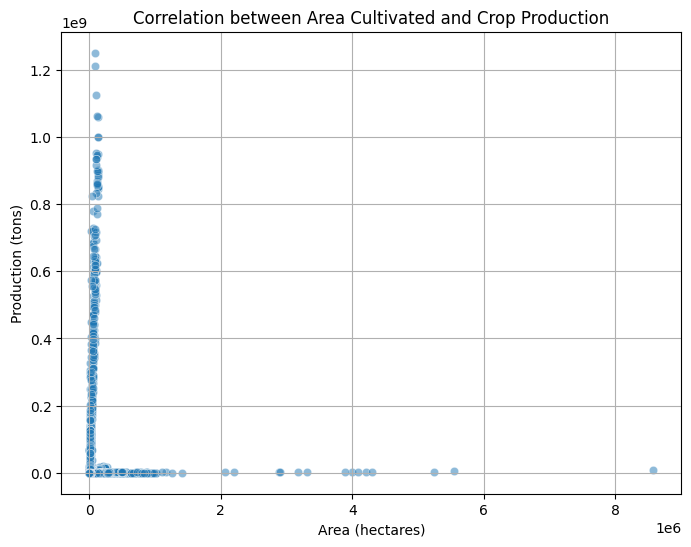

In [45]:
# Correlation Analysis
import seaborn as sns

# Plot correlation between area and production
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Area', y='Production', data=df, alpha=0.5)
plt.title('Correlation between Area Cultivated and Crop Production')
plt.xlabel('Area (hectares)')
plt.ylabel('Production (tons)')
plt.grid(True)
plt.show()